# Casos de test generados aleatoriamente

In [1]:
import random

In [2]:
random.seed(2020)

In [3]:
ns = list(range(1,31,1))

In [4]:
resistencias = [1, 10, 20, 50, 75, 100]

In [5]:
def crear_test(n):
    pares = list()
    for i in range(n):
        w, r = random.randint(1, 30), random.randint(1, 50)
        pares.append([w, r])
    return pares

In [6]:
with open('tests_tp1.txt', 'a') as file:
    file.write("{} {}\n".format(n, r))
    for r in resistencias:
        for n in ns:
            file.write("{} {}\n".format(n, r))
            for p in crear_test(n):
                file.write("{} {}\n".format(p[0], p[1]))
            file.write("\n")

NameError: name 'n' is not defined

## Analisis

In [7]:
from matplotlib import pyplot as plt, cm
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
results_fb = pd.read_csv('results_fb.txt', delimiter=' ', header=None)
results_fb = results_fb.rename(columns={0:'n',1:'r',2:'res',3:'t'})
results_fb['esperado'] = 2 ** results_fb['n'] * 20

In [9]:
results_btf = pd.read_csv('results_btf.txt', delimiter=' ', header=None)
results_btf = results_btf.rename(columns={0:'n',1:'r',2:'res',3:'t'})
results_btf['esperado'] = 2 ** results_btf['n'] * 0.0020

In [10]:
results_bto = pd.read_csv('results_bto.txt', delimiter=' ', header=None)
results_bto = results_bto.rename(columns={0:'n',1:'r',2:'res',3:'t'})
results_bto['esperado'] = 2 ** results_bto['n'] * 0.00006

In [20]:
results_pd = pd.read_csv('results_dp.txt', delimiter=' ', header=None)
results_pd = results_pd.rename(columns={0:'n',1:'r',2:'res',3:'t'})
results_pd['esperado'] = results_pd['n'] * results_pd['r'] * 6

In [21]:
res = pd.DataFrame([results_fb.res.tolist(), results_btf.res.tolist(), results_bto.res.tolist(), results_pd.res.tolist()]).transpose()

In [22]:
res = res.rename(columns={0:"FB",1:"BTF",2:"BTO",3:"PD"})

In [23]:
res['CORRECT_FB'] = True
res['CORRECT_BTF'] = res['BTF'] == res['FB']
res['CORRECT_BTO'] = res['BTO'] == res['FB']
res['CORRECT_PD'] = res['PD'] == res['FB']

In [24]:
results_fb[44:49]

,n,r,res,t,esperado
44,15,10,3,606250,655360
45,16,10,4,1204175,1310720
46,17,10,2,2408763,2621440
47,18,10,3,4821994,5242880
48,19,10,2,9625261,10485760


In [25]:
pd.DataFrame(res[['CORRECT_FB','CORRECT_BTF','CORRECT_BTO','CORRECT_PD']].sum())

,0
CORRECT_FB,180
CORRECT_BTF,180
CORRECT_BTO,180
CORRECT_PD,90


In [17]:
res.loc[~res.CORRECT_PD]

,FB,BTF,BTO,PD,CORRECT_FB,CORRECT_BTF,CORRECT_BTO,CORRECT_PD
47,3,3,3,2,True,True,True,False
88,6,6,6,5,True,True,True,False
104,7,7,7,8,True,True,True,False
107,6,6,6,7,True,True,True,False
109,6,6,6,7,True,True,True,False
112,6,6,6,7,True,True,True,False
113,5,5,5,6,True,True,True,False
116,6,6,6,7,True,True,True,False
117,7,7,7,8,True,True,True,False
131,5,5,5,4,True,True,True,False


## Graficos y demas
### FB

In [ ]:
y = results_fb.loc[results_fb.r==100].t.tolist()
x = results_fb.loc[results_fb.r==100].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
fig_fb = sns.lineplot(data=results_fb, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Fuerza Bruta", xlabel='n', ylabel='tiempo (ns)')

## BTF

[Text(0, 0.5, 'tiempo (ns)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

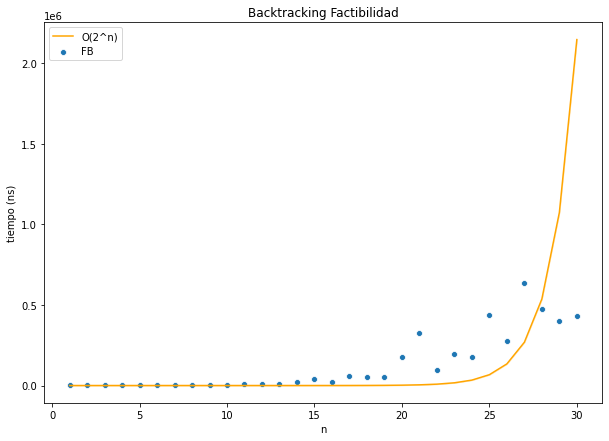

In [49]:
y = results_btf.loc[results_btf.r==100].t.tolist()
x = results_btf.loc[results_btf.r==100].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
fig_fb = sns.lineplot(data=results_btf, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ns)')

### BTO

[Text(0, 0.5, 'tiempo (ns)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

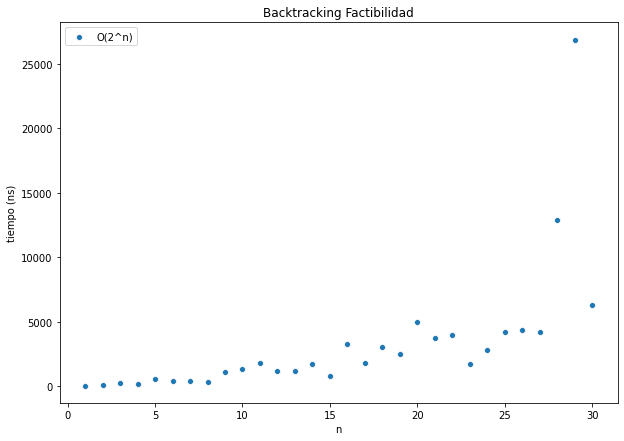

In [100]:
y = results_bto.loc[results_bto.r==10].t.tolist()
x = results_bto.loc[results_bto.r==10].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ns)')

y = results_bto.loc[results_bto.r==100].t.tolist()
x = results_bto.loc[results_bto.r==100].n.tolist()
sns.scatterplot(x, y)
plt.title("Backtracking podas por optimalidad")
plt.xlabel("n")
plt.ylabel("tiempo (nanosegundos)")
plt.show()

### PD

[Text(0, 0.5, 'tiempo (ns)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Programacion dinamica')]

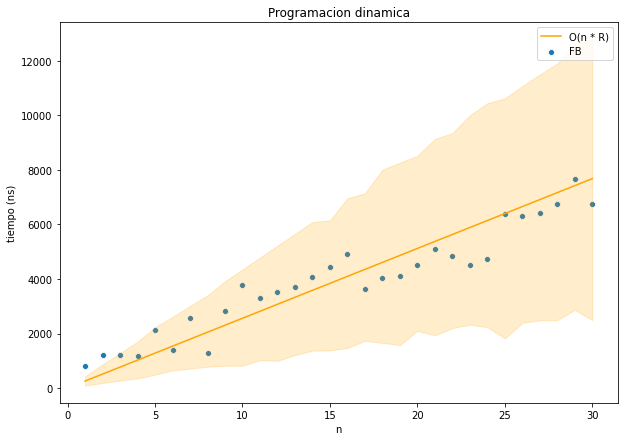

In [61]:
y = results_pd.loc[results_pd.r==10].t.tolist()
x = results_pd.loc[results_pd.r==10].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
fig_fb = sns.lineplot(data=results_pd, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(n * R)','FB'])
fig_fb.set(title="Programacion dinamica", xlabel='n', ylabel='tiempo (ns)')